# Teorema Central do Limite

### Amostras aleatórias

Definição: Uma amostra aleatória simples de tamanho n da variável aleatória X, com uma dada distribuição de probabilidades, é o conjunto de variáveis aleatórias independentes $X_1,X_2, \ldots, X_n$, cada uma com a mesma distribuição de $X$.

Podemos gerar amostras aleatórias a partir de uma população com uma dada distribuição de probabilidade. Vamos supor que a população segue uma distribuição normal com média $\mu$ e desvio padrão $\sigma$. Gerando $n$ amostras de tamanho $m$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


mu = 0
sigma = 1
n = 3
m = 4
for i in range(0,n):
    X = np.random.normal(mu, sigma,m)
    print('Amostra', i, ':', X)

Amostra 0 : [ 0.38991711 -0.54979249  0.09858629  0.28866868]
Amostra 1 : [ 0.17756082 -2.13938964 -0.76150407 -0.70590459]
Amostra 2 : [-1.0920998   1.14843218 -0.92844025  1.79887922]


Teorema: Seja $X$ uma variável aleatória com esperança $E[X] = \mu$ e variância $V(X) = \sigma^2$. Seja $\bar{X}$ a média amostral de uma amostra de tamanho $n$. Então:
$$
E[\bar{X}]= \mu, \quad V(\bar{X})=\frac{\sigma^2}{n}.
$$

Vamos verificar esse teorema através de simulações:

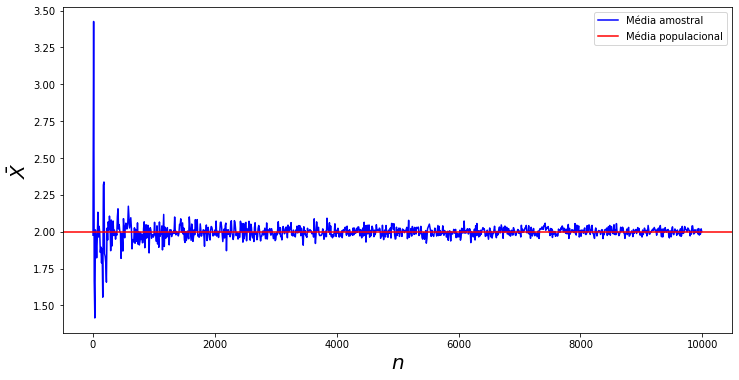

In [68]:
vn = []
vmean = []
mu = 2
std = 1
for n in np.arange(1,10000,10):
    #X = np.random.normal(mu,std, n) # X is generated from a normal distribution
    X = np.random.exponential(mu, n) # X is generated from an exponential probability distribution
    vmean.append(np.mean(X))
    vn.append(n)
plt.figure(figsize=(12,6))
plt.plot(vn, vmean, '-', color='blue', label='Média amostral')
plt.axhline(y=mu, color='r', linestyle='-', label = 'Média populacional')
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.show(True)

Notamos que a média amostral converge para a média populacional $\mu$ quando aumentamos o tamanho da amostra.

## Teorema Central do Limite

**Teorema:** Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e variância $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande, de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>

Vamos verificar esse teorema através de simulações:

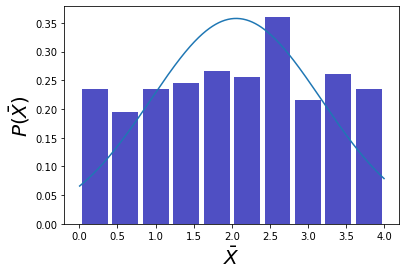

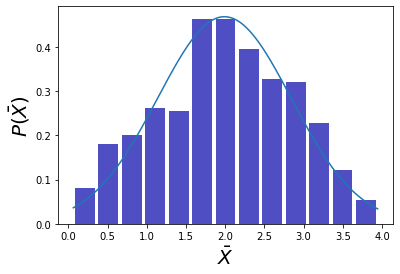

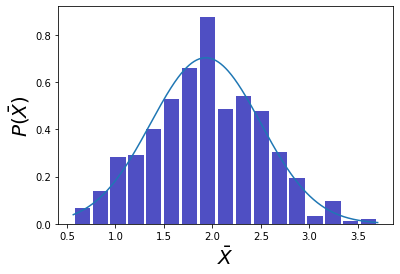

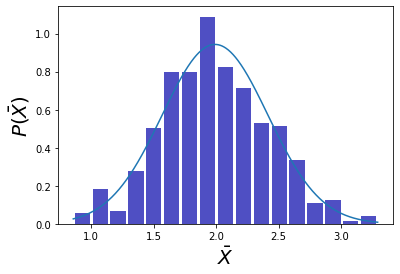

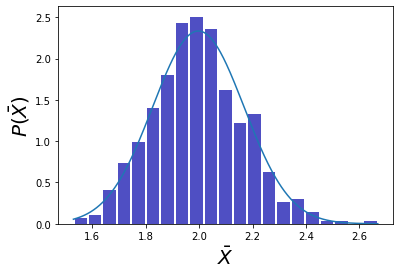

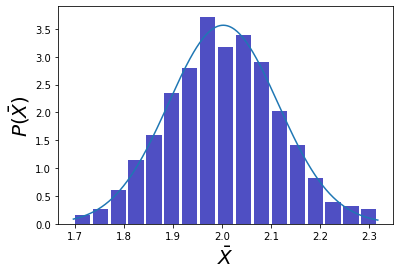

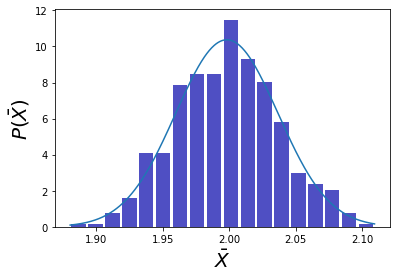

In [85]:
import scipy.stats as stats

vS =  [1, 2 , 4 , 8, 50, 100, 1000]# sample size
S = 500 # number of samples
mu = 2

for n in vS: #sample size
    vmean = []
    for s in range(0,S): # select s samples of size n
        X = np.random.uniform(0,2*mu, n) # X is generated from a uniform probability distribution
        #X = np.random.exponential(mu, n) # X is generated from an exponential probability distribution
        vmean.append(np.mean(X))
    plt.figure(figsize=(6,4))
    plt.hist(x=vmean, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)

    # Plot the theoretical curve
    #xt = plt.xticks()[0]  
    xmin, xmax = min(vmean), max(vmean)  
    lnspc = np.linspace(xmin, xmax, len(vmean))
    m, s = stats.norm.fit(vmean) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.show(True)

Notamos que a distribuição da média amostral tende à distribuição Normal quando aumentamos o tamanho da amostra. Notem que a média da distribuição converge para a média da população, isto é, $E[\bar{X}]=\mu$.

### Teorema Central do Limite: Exemplo

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

A média e o desvio padrão dessa população:

In [93]:
X = [3,6,8]
P = [0.4,0.3,0.3]
E = 0
E2 = 0
for i in range(0, len(X)):
    E = E + X[i]*P[i]
    E2 = E2 + (X[i]**2)*P[i]
V = E2-E**2
print("Esperança:", E, "Variância:",V)

Esperança: 5.4 Variância: 4.439999999999991


Vamos sortear várias amostras de tamanho n=40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

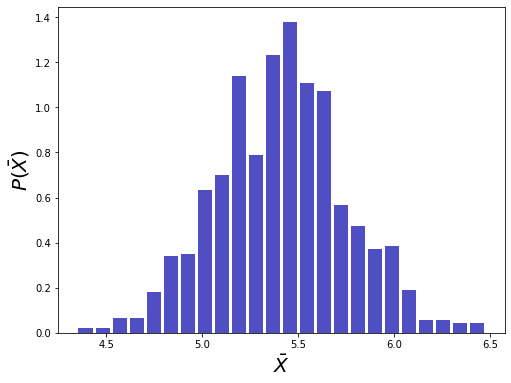

Media das amostras: 5.414375 Media da população: 5.4


In [94]:
n = 40
ns = 1000 #numero de simulacoes
vx = [] # armazena a media amostral
for s in range(0,ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)    
print("Media das amostras:", np.mean(vx), "Media da população:", E)

A probabilidade de ser maior do que 5:

In [95]:
nmaior = 0
for i in range(0, len(vx)):
    if(vx[i] > 5):
        nmaior = nmaior + 1
nmaior = nmaior/len(vx)
print("Probabilidade de ser maior do que 5:", nmaior, "Valor teórico:", 0.88)

Probabilidade de ser maior do que 5: 0.882 Valor teórico: 0.88


**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=1)=0,4; P(X=5)=0,3; P(X=10)=0,3. Uma amostra com 100 observações é sorteada. Qual é a probabilidade de que a média amostral ser menor do que 5?

Vamos sortear várias amostras de tamanho n=100 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = [1,5,10]
P = [0.4,0.3,0.3]
E = 0
E2 = 0
for i in range(0, len(X)):
    E = E + X[i]*P[i]
    E2 = E2 + (X[i]**2)*P[i]
V = E2-E**2
print("Esperança:", E, "Variância:",V)

n = 100
ns = 1000 #numero de simulacoes
vx = [] # armazena a media amostral
for s in range(0,ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))
nmenor = 0
for i in range(0, len(vx)):
    if(vx[i] < 5):
        nmenor = nmenor + 1
nmenor = nmenor/len(vx)
print("P(X < 5)=", nmenor, "Valor teórico:", 0.60)

Esperança: 4.9 Variância: 13.889999999999993
P(X < 5)= 0.612 Valor teórico: 0.6


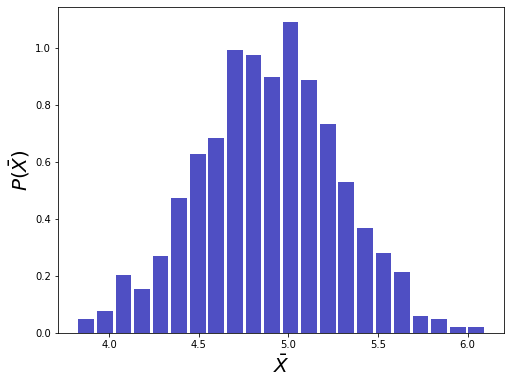

Media das amostras: 4.8873299999999995 Media da população: 4.9


In [9]:
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)    
print("Media das amostras:", np.mean(vx), "Media da população:", E)